

# Evaluación de Regresores



Los modelos de regresión predicen valores numéricos continuos.

In [1]:
import numpy as np
#import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline



Creamos algunos datos de prueba. Una variable dependiente y otra dependiente. Y las representamos

In [2]:
rng = np.random.RandomState(42)
mean = [100, 1000]
cov = [[1, 0.9], [0.9, 1]]
sample = rng.multivariate_normal(mean, cov, size=100)
x, y = sample[:, 0], sample[:, 1]
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.multivariate_normal.html

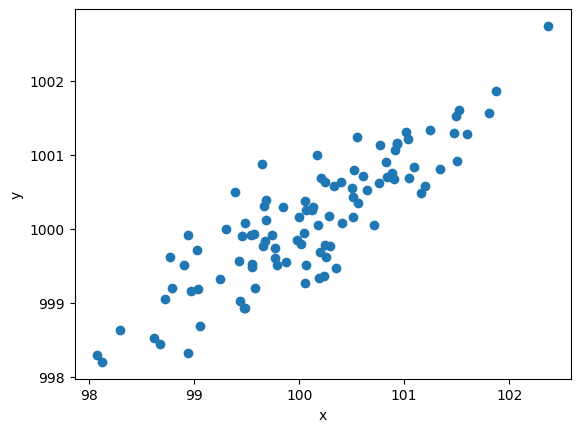

In [3]:
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()



Calculamos la matriz de correlaciones. Parece que ambas variables están bastante correladas.

In [4]:
np.corrcoef([x, y])

array([[1.        , 0.86645911],
       [0.86645911, 1.        ]])



Un modelo muy sencillo. Una regresión lineal.

\begin{equation}
Y = b + X·w1
\end{equation}

In [5]:
w = np.polyfit(x, y, deg=1)
b, w1 = w[1], w[0]
print('y-intercept: {0:.2f}'.format(b))
print("slope: {0:.2f}".format(w1))

# https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html

y-intercept: 914.77
slope: 0.85




Nuestro modelo tendrá esta forma:

\begin{equation}
Y = 914.77 + X·0.85
\end{equation}

In [6]:
def my_linear_model(x):
    return x*w1 + b

def predict(model, x):
    return model(x)



Incluimos una recta con la representación del modelo.

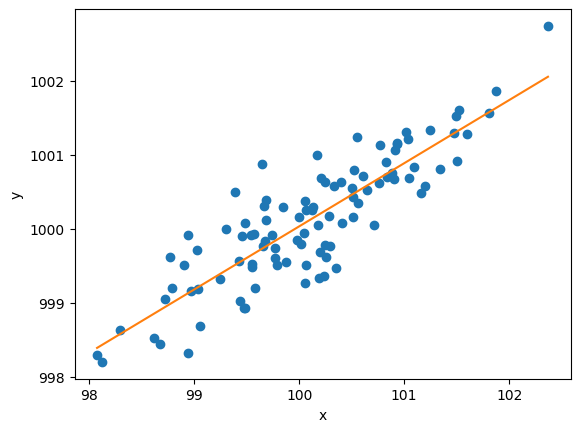

In [7]:
extremes = np.array([np.min(x), np.max(x)])
predictions = predict(model=my_linear_model,x=extremes)

plt.plot(x, y, marker='o', linestyle='')
plt.plot(extremes, predictions)
plt.xlabel('x')
plt.ylabel('y')
plt.show()



# Análisis de residuos



Se comprueba cuál es la desviación para cada predicción, sobre lo que debería haber dado. Cuanto más se ajuste a la diagonal, mejor será el resultado.

In [8]:
predictions = predict(model = my_linear_model, x = x)
residuals = y - predictions

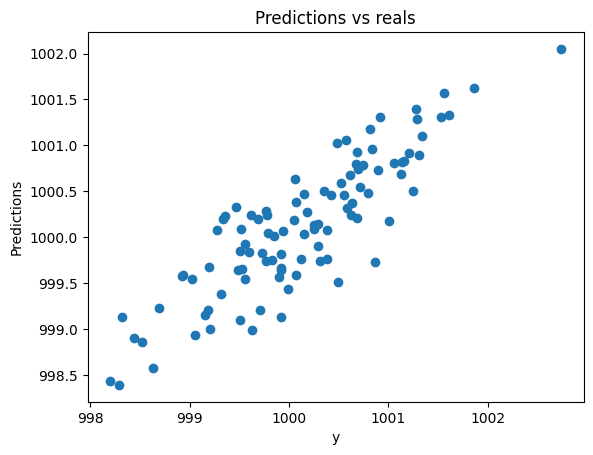

In [9]:
plt.plot(y, predictions, marker='o', linestyle='')
plt.title("Predictions vs reals")
plt.ylabel("Predictions")
plt.xlabel('y')
plt.show()



Para estudiar el error cometido, se usa el análisis de residuos, es decir, cual es la diferencia entre la predicción del modelo y lo que realmente produjo.

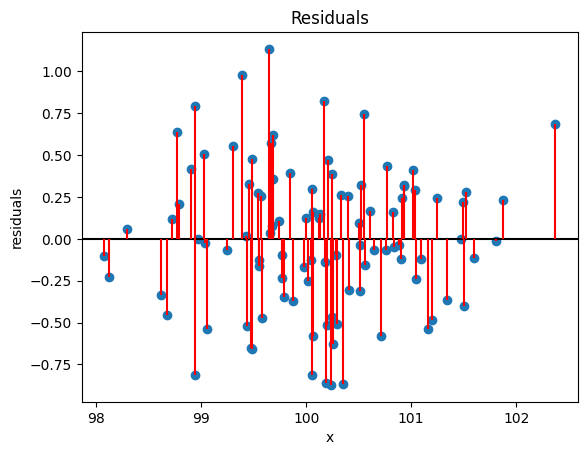

In [10]:
predictions = predict(model = my_linear_model, x = x)
residuals = y - predictions

plt.plot(x, residuals, marker='o', linestyle='')
plt.title("Residuals")
plt.xlabel('x')
plt.ylabel('residuals')
plt.axhline(y=0,c="k")
plt.vlines(x=x, ymax=residuals, ymin=0, colors="red")
plt.show()

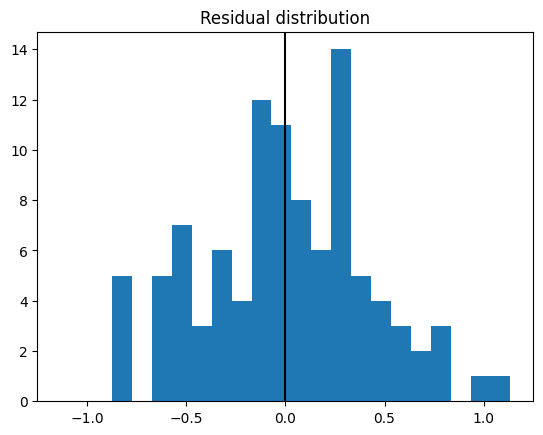

In [11]:
plt.hist(residuals, bins=20)
plt.xlim([-1.25,1.25])
plt.axvline(x=0,c="k")
plt.title("Residual distribution")
plt.show()



## Desviacion de los residuos

In [12]:
np.std(residuals)

0.42570945276574956

In [13]:
np.mean(residuals)

2.8990143619012086e-13



Dividimos la muestra en 4 quartiles y calculamos las desviaciones típicas y medias, para ver si el residuo se comete por igual en todos los rangos

In [14]:
q1 = np.percentile(x,25)
q2 = np.percentile(x,50)
q3 = np.percentile(x,75)

In [15]:
print(np.mean(np.abs(residuals[x<q1])))
print(np.std(residuals[x<q1]))

0.39060597620883525
0.4747961834916049


In [16]:
print(np.mean(np.abs(residuals[(x > q1) & (x < q2)])))
print(np.std(residuals[(x > q1) & (x < q2)]))

0.3202202523099777
0.4094098397423015


In [17]:
print(np.mean(np.abs(residuals[(x > q2) & (x < q3)])))
print(np.std(residuals[(x > q2) & (x < q3)]))

0.40347227934046714
0.4722765764622617


In [18]:
print(np.mean(np.abs(residuals[(x > q3)])))
print(np.std(residuals[(x > q3)]))

0.2563150171078996
0.30381116800706354




De lo anterior se deduce que se predicen mejor los valores del q4. Tiene menor residuo medio y menor desviación



# Evaluar el modelo



Las métricas de evaluación utilizadas en Regresión nos sirven para comparar diferentes modelos utilizados con nuestros datos.

Cada una de ellas tiene sus ventajas e inconvenientes, en algunos casos no tendrán mucho sentido utilizarlas dada la naturaleza del predictor



## R<sup>2</sup>
Coeficiente de determinación.

Es la proporción de varianza explicada por el modelo o la reducción de error sobre el modelo nulo.

*   El modelo nulo predice la media de la respuesta observada así que tiene constante pero no pendiente.

Este valor oscila entre 0 y 1.

*   Cuanto más alto sea el valor mejor será el resultado, porque la proporción de varianza explicada por el modelo será mayor.





\begin{matrix}
 & SS_{total} = \frac{1}{n} \sum_{i}^{n} (y_i - \overline{y})^2 \\
 & SS_{residuos} = \frac{1}{n} \sum_{i}^{n} (y_{i}' - \overline{y})^2 \\
 & R^2 = SS_{total} / SS_{residuos}
\end{matrix}


In [19]:
SS_total = np.sum((y - np.mean(y))**2) # Variance
SS_residual = np.sum((predictions - np.mean(y))**2) # Deviation of the prediction

r_squared = SS_residual / SS_total
r_squared

0.7507513848726016

In [20]:
from sklearn import metrics
metrics.r2_score(y, predictions)

0.7507513848726148



## MAE

Error medio absoluto. Penaliza por igual todas las diferencias. Es muy sensible a outliers y valores inesperados.

\begin{equation}
MAE = \frac{1}{n} \sum_{i}^{n} |y_i - y_i'|
\end{equation}

In [21]:
mae = np.mean(np.abs(y - predictions))
mae

0.34265338124179495

In [22]:
metrics.mean_absolute_error(y, predictions)

0.34265338124179495



## MAPE
Error absoluto porcentual medio. Medida porcentual del error relativo. Cuidado, puede dar lugar a errores al dividir por cero.

\begin{equation}
MAPE = \frac{100%}{n} \sum_{i}^{n} |\frac{y_i - y_i'}{y_i}|
\end{equation}



In [23]:
mape = 100 * np.mean(np.sum(np.abs((predictions - y)/y)))
mape

3.426313251258286



## MSE
Error cuadrático medio. Penaliza más las grandes diferencias que las pequeñas.
\begin{equation}
MSE = \frac{1}{n} \sum_{i}^{n} (y_i - y_i')^{2}
\end{equation}

In [24]:
mse = np.mean((y - predictions)**2)
mse

0.181228538174114

In [25]:
metrics.mean_squared_error(y, predictions)

0.181228538174114



## RMSE
Raíz error cuadrático medio. Penaliza más las grandes diferencias que las pequeñas. Es interpretable en las mismas unidades que *y*.
\begin{equation}
RMSE = \frac{1}{n} \sum_{i}^{n} \sqrt{(y_i - y_i')^{2}}
\end{equation}

In [26]:
rmse = np.sqrt(np.mean((y - predictions)**2))
rmse

0.4257094527657496

In [27]:
np.sqrt(metrics.mean_squared_error(y, predictions))

0.4257094527657496



---

## Regresión lineal múltiple

Para ajustar modelo de regresión múltiple podemos usar la librería scikit-learn.

En este ejemplo usaremos un dataset que contiene diez variables con el estado basal de pacientes de cada paciente y una variable cuantitativa que mide la progresión de su enfermedad un año después.

In [28]:
%matplotlib inline
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn import datasets

In [29]:
diabetes = datasets.load_diabetes()    # http://scikit-learn.org/stable/datasets/index.html#diabetes-dataset



Let's explore the dataset

In [30]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

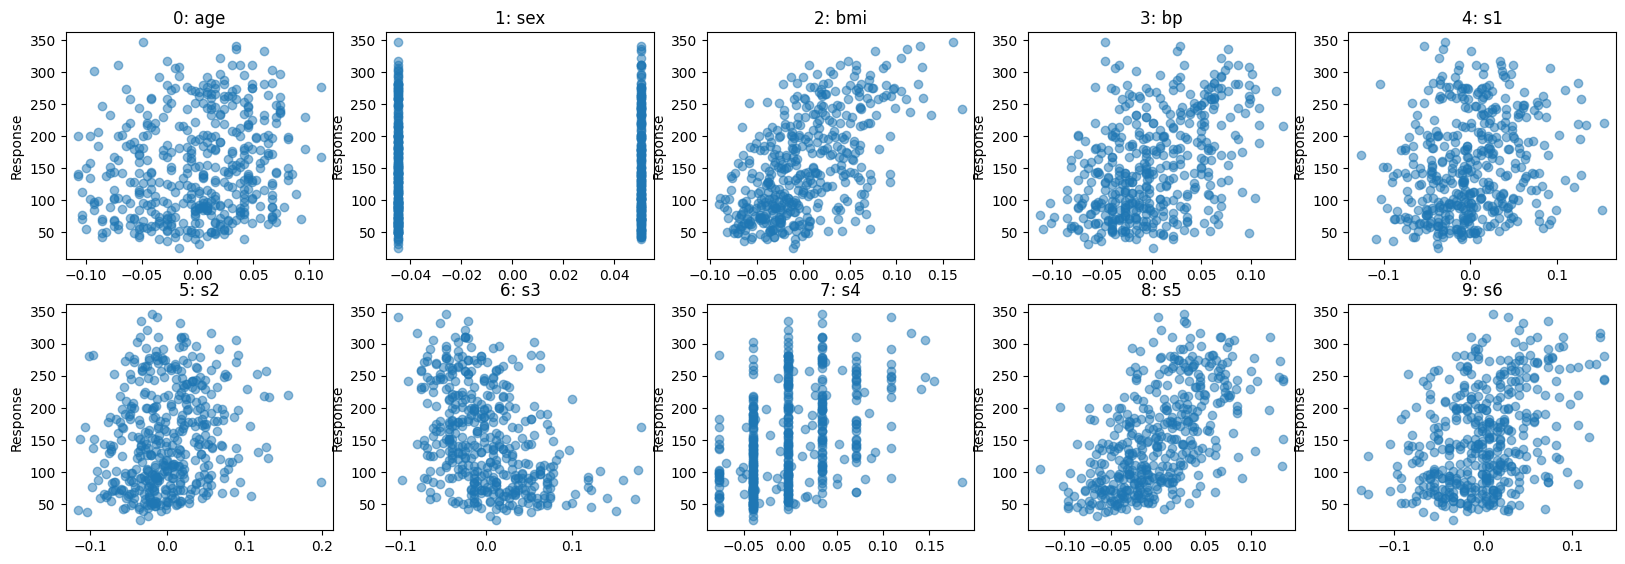

In [31]:
X, y = diabetes.data, diabetes.target
fig, axes = plt.subplots(3, 5, figsize=(20, 10))
for i, ax in enumerate(axes.ravel()):
    if i > 9:
        ax.set_visible(False)
        continue
    ax.plot(X[:, i], y, 'o', alpha=.5)
    ax.set_title("{}: {}".format(i, diabetes.feature_names[i]))
    ax.set_ylabel("Response")

In [32]:
diabetes_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [33]:
regr = LinearRegression(fit_intercept=True)
regr.fit(X,y)
y_hat = regr.predict(X)

print ('Coefficients: ',  regr.intercept_, regr.coef_)
print ('Average error: ', metrics.mean_absolute_error(y,y_hat))

Coefficients:  152.13348416289597 [ -10.0098663  -239.81564367  519.84592005  324.3846455  -792.17563855
  476.73902101  101.04326794  177.06323767  751.27369956   67.62669218]
Average error:  43.27745202531506




## R<sup>2</sup>
Coeficiente de determinación.

\begin{matrix}
 & SS_{total} = \frac{1}{n} \sum_{i}^{n} (y_i - \overline{y})^2 \\
 & SS_{residuos} = \frac{1}{n} \sum_{i}^{n} (y_{i}' - \overline{y})^2 \\
 & R^2 = SS_{total} / SS_{residuos}
\end{matrix}


In [34]:
SS_total = np.sum((y - np.mean(y))**2) # Variance
SS_residual = np.sum((y_hat - np.mean(y))**2) # Deviation of the prediction

r_squared = SS_residual / SS_total
r_squared

0.5177484222203503

In [35]:
from sklearn import metrics
metrics.r2_score(y, y_hat)

0.5177484222203499



## MAE

Error medio absoluto.

\begin{equation}
MAE = \frac{1}{n} \sum_{i}^{n} |y_i - y_i'|
\end{equation}

In [36]:
mae = np.mean(np.abs(y - y_hat))
mae

43.27745202531506

In [37]:
metrics.mean_absolute_error(y, y_hat)

43.27745202531506



## MAPE
Error absoluto porcentual medio.

\begin{equation}
MAPE = \frac{100%}{n} \sum_{i}^{n} |\frac{y_i - y_i'}{y_i}|
\end{equation}



In [38]:
mape = 100 * np.mean(np.sum(np.abs((y_hat - y)/y)))
mape

17143.491214333124



## MSE
Error cuadrático medio.
\begin{equation}
MSE = \frac{1}{n} \sum_{i}^{n} (y_i - y_i')^{2}
\end{equation}

In [39]:
mse = np.mean((y - y_hat)**2)
mse

2859.69634758675

In [40]:
metrics.mean_squared_error(y, y_hat)

2859.69634758675



## RMSE
Raíz error cuadrático medio.
\begin{equation}
RMSE = \frac{1}{n} \sum_{i}^{n} \sqrt{(y_i - y_i')^{2}}
\end{equation}

In [41]:
rmse = np.sqrt(np.mean((y - y_hat)**2))
rmse

53.47612876402657

In [42]:
np.sqrt(metrics.mean_squared_error(y, y_hat))

53.47612876402657



## Problema con R<sup>2</sup>

Añado una variable construida aleatoriamente.

In [43]:
np.random.seed(12345)
diabetes_df['randCol'] = np.random.uniform(0,1,442)
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html

In [44]:
diabetes.feature_names.append('randCol')

In [45]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6', 'randCol']

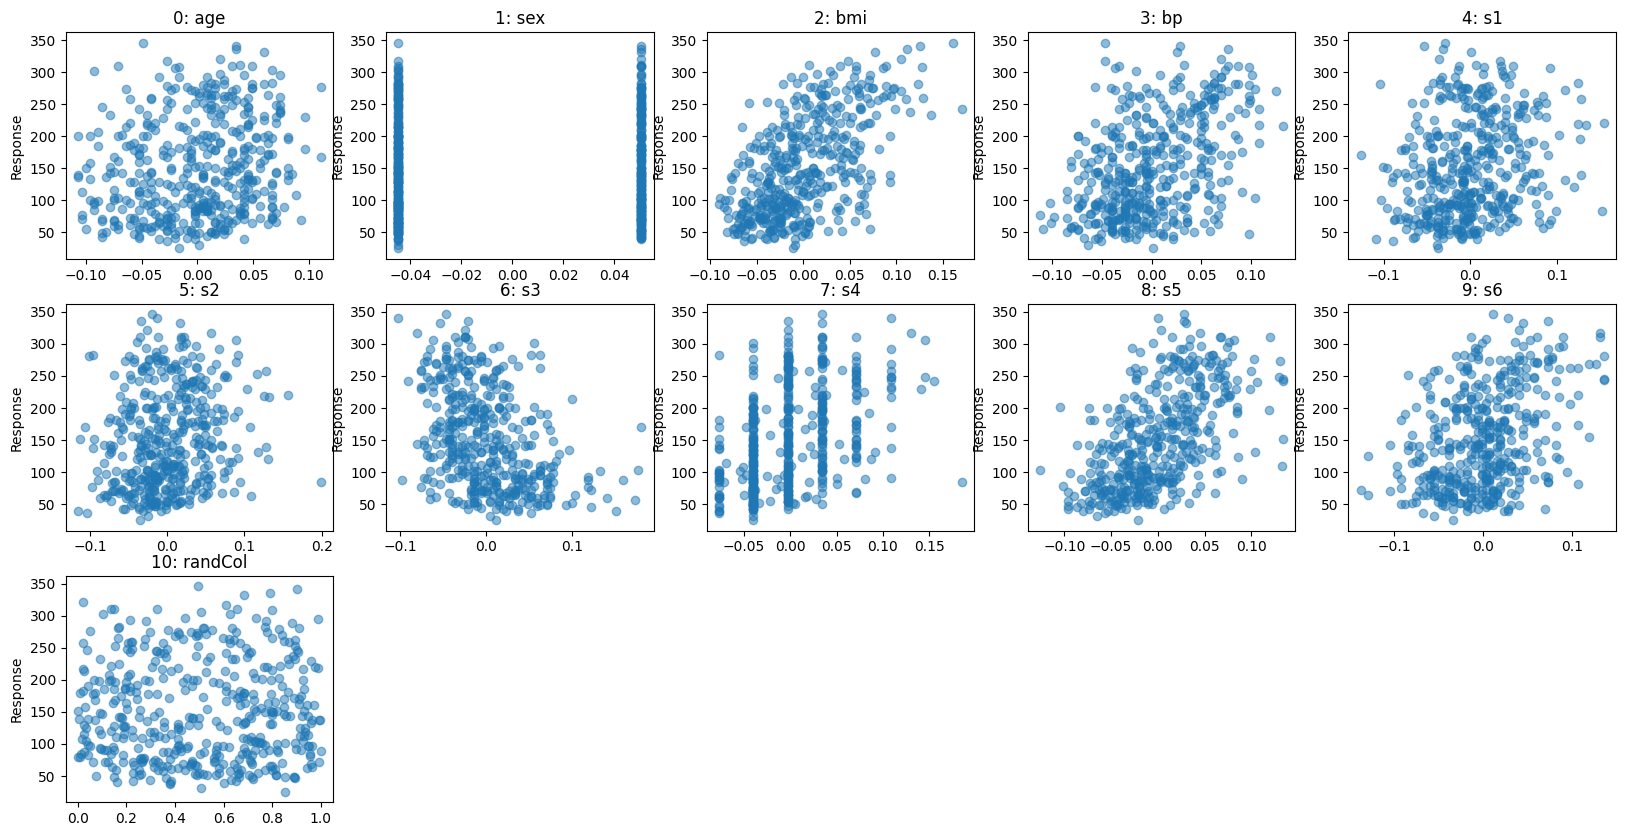

In [46]:
X2, y = diabetes_df.values, diabetes.target
fig, axes = plt.subplots(3, 5, figsize=(20, 10))
for i, ax in enumerate(axes.ravel()):
    if i > 10:
        ax.set_visible(False)
        continue
    ax.plot(X2[:, i], y, 'o', alpha=.5)
    ax.set_title("{}: {}".format(i, diabetes.feature_names[i]))
    ax.set_ylabel("Response")



Obviamente esta variable nueva no tiene ninguna asociación con la variable respuesta.

In [47]:
regr2 = LinearRegression(fit_intercept=True)
regr2.fit(X2,y)
y_hat2 = regr2.predict(X2)

print ('Coefficients: ',  regr2.intercept_, regr2.coef_)
print ('Average error: ', metrics.mean_absolute_error(y,y_hat2))

Coefficients:  148.52836186912495 [  -6.76121577 -239.77090023  517.73151725  323.69916983 -802.06993901
  488.00511865  100.47761581  171.87222202  758.79282477   67.26914321
    7.15624178]
Average error:  43.225471311951914




## R<sup>2</sup>

Vamos a calcular R<sup>2</sup> con esta nueva variable


In [48]:
SS_total = np.sum((y - np.mean(y))**2) # Variance
SS_residual = np.sum((y_hat2 - np.mean(y))**2) # Deviation of the prediction

r_squared2 = SS_residual / SS_total
r_squared2

0.518437131062697

In [49]:
from sklearn import metrics
metrics.r2_score(y, y_hat2)

0.5184371310626968



Recuerda que el antiguo R^2 era:

In [50]:
metrics.r2_score(y, y_hat)

0.5177484222203499



**R<sup>2</sup> siempre aumentará su valor si añades más variables al modelo**, incluso si están incorreladas con la respuesta.



## R<sup>2</sup> ajustado
Es la proporción de varianza explicada por el modelo o la reducción de error sobre el modelo nulo, al igual que R^2, pero teniendo en cuenta el número de variables incluidas en el modelo.
\begin{equation}
\bar{R^2} = 1-(1-R^2)\frac{n-1}{n-p-1}, \\
\textrm{donde: n es el tamaño de la muestra y p el número de variables explicatorias en el modelo.}
\end{equation}


In [51]:
r_squared_adj2 = 1-(1-r_squared2)*(X2.shape[0]-1)/(X2.shape[0]-X2.shape[1]-1)

In [52]:
r_squared_adj2

0.5061180809270915

In [53]:
r_squared_adj = 1-(1-r_squared)*(X.shape[0]-1)/(X.shape[0]-X.shape[1]-1)

In [54]:
r_squared_adj

0.5065592904853236



Ahora si este R<sup>2</sup> ajustado es menor cuando no incluimos la variable no correlada.